In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("../../data/data_world.csv")
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1930-12-08T08:01:02.000Z,23.2610,120.2770,15.00,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930-12-03T18:51:47.000Z,18.2330,96.2980,10.00,7.4,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1930-12-02T07:01:30.000Z,25.8540,98.3560,35.00,6.2,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930-11-28T07:32:56.000Z,18.7790,-106.7670,15.00,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1930-11-25T19:02:53.000Z,35.0500,139.1290,15.00,6.9,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797041,2018-09-01T01:14:38.230Z,-30.4830,-177.9279,43.90,4.3,mb,NaN,165.0,1.233,0.87,...,2018-11-07T18:37:12.040Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797042,2018-09-01T01:07:59.120Z,-10.7558,124.3621,10.00,4.0,mb,NaN,112.0,0.998,1.23,...,2018-11-07T18:37:12.040Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797043,2018-09-01T01:00:13.810Z,-5.5167,147.1735,217.56,4.6,mb,NaN,119.0,3.455,0.71,...,2018-11-07T18:37:07.040Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797044,2018-09-01T00:27:11.440Z,46.8819,155.6566,10.00,4.3,mb,NaN,94.0,6.370,1.21,...,2018-11-07T18:37:12.040Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%S.%fZ")

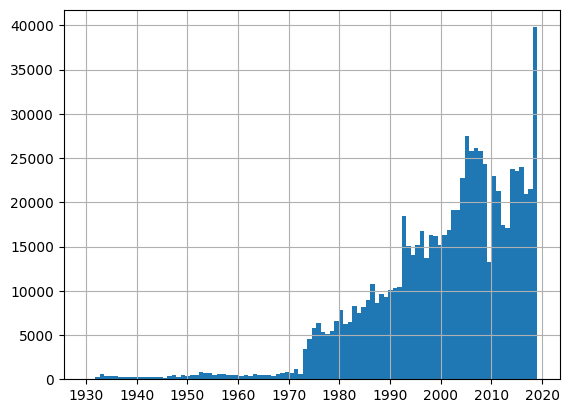

In [5]:
# plot count of earthquakes over time
df["time"].hist(bins=100)
plt.show()

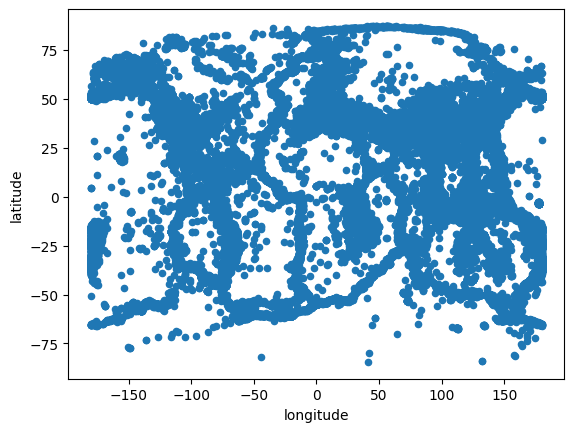

In [9]:
# plot count of earthquakes over longitude and latitude
df.plot.scatter(x="longitude", y="latitude")
plt.show()

<Axes: >

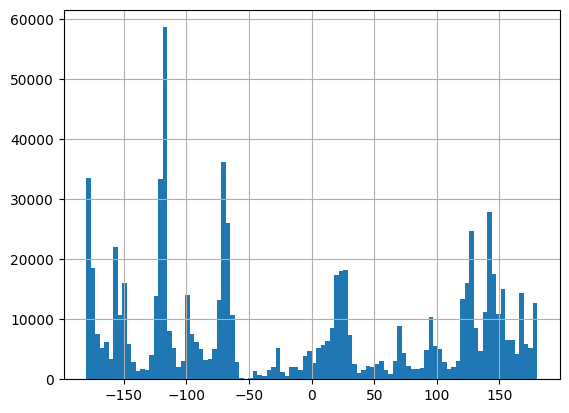

In [21]:
# plot count of earthquakes over longitude
df["longitude"].hist(bins=100)

<Axes: >

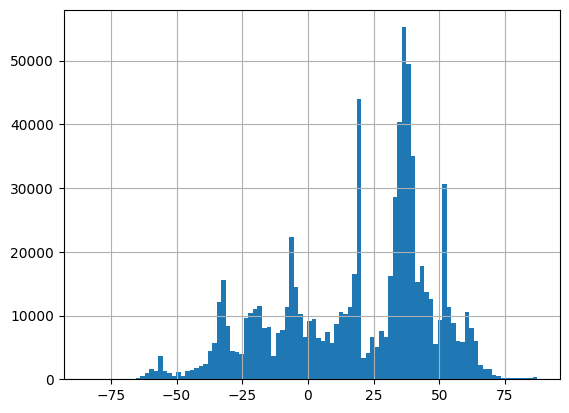

In [22]:
# plot count of earthquakes over latitude
df["latitude"].hist(bins=100)

In [32]:
geo_split = 10
df["latitude"] = df["latitude"] // geo_split
df["latitude"] = df["latitude"] + np.abs(np.min(df["latitude"]))

df["longitude"] = df["longitude"] // geo_split
df["longitude"] = df["longitude"] + np.abs(np.min(df["longitude"]))

df["pos"] = df["latitude"].astype(str) + "_" + df["longitude"].astype(str)

In [33]:
df_agg = df.groupby(["pos"]).count().reset_index()

In [34]:
df_agg

,pos,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0.0_13.0,1,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.0_22.0,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0.0_31.0,2,2,2,2,2,2,2,2,0,...,2,0,0,0,0,0,0,0,0,0
3,0.0_33.0,2,2,2,2,2,2,1,1,0,...,2,0,0,0,0,0,0,0,0,0
4,1.0_2.0,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,9.0_5.0,2,2,2,2,2,2,0,1,1,...,2,0,0,0,0,0,0,0,0,0
517,9.0_6.0,6,6,6,6,6,6,4,2,0,...,6,0,0,0,0,0,0,0,0,0
518,9.0_7.0,411,411,411,411,411,411,179,205,64,...,411,0,0,0,0,0,0,0,0,0
519,9.0_8.0,292,292,292,292,292,292,97,134,58,...,292,0,0,0,0,0,0,0,0,0


<BarContainer object of 521 artists>

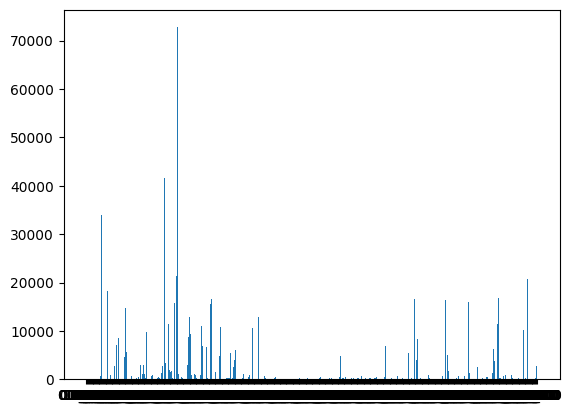

In [35]:
plt.bar(df_agg["pos"], df_agg["time"])